In [2]:
import pandas as pd

data = pd.read_csv('diabetes.csv')
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
from sklearn.model_selection import train_test_split

X = data.drop('Outcome', axis="columns")

y = data["Outcome"] # target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
print(X_train.shape, X_test.shape)

(576, 8) (192, 8)


In [4]:
data.describe()
# Normalizing the data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### template

1. import libraises
2. dataset load
3. data preparation /preprocess
4. model create
5. train the model
6. predict (test data bilan)
7. eveluate the model
8. plot

In [5]:
from sklearn.linear_model import LogisticRegression 

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


In [6]:
from sklearn import metrics

acc = metrics.accuracy_score(y_test, y_pred)
print("Accuracy: ", acc)


report = metrics.classification_report(y_test, y_pred)
print("Classification Report: \n", report)

matrix = metrics.confusion_matrix(y_test, y_pred)
print("Confusion Matrix: \n", matrix)

Accuracy:  0.8020833333333334
Classification Report: 
               precision    recall  f1-score   support

           0       0.82      0.91      0.86       130
           1       0.75      0.58      0.65        62

    accuracy                           0.80       192
   macro avg       0.78      0.74      0.76       192
weighted avg       0.80      0.80      0.79       192

Confusion Matrix: 
 [[118  12]
 [ 26  36]]


In [7]:
(118+36)/(118+36+12+26)

0.8020833333333334

[0.95646738 0.16558052 0.08714025 0.63608315 0.11443391]


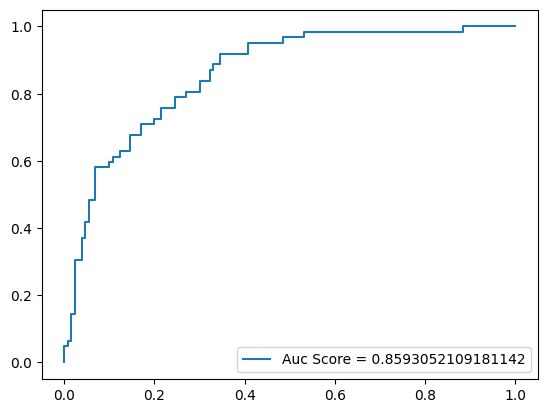

In [ ]:
import matplotlib.pyplot as plt

y_pred_proba = model.predict_proba(X_test)[::, 1]
print(y_pred_proba[:5])
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.plot(fpr,tpr, label = f"Auc Score = {str(auc)}")
plt.legend(loc=4)
plt.show()

### template

1. import libraises
2. dataset load
3. data preparation /preprocess
4. model create
5. train the model
6. predict (test data bilan)
7. eveluate the model
8. plot

(576, 8) (192, 8)
Accuracy:  0.8020833333333334
Classification Report: 
               precision    recall  f1-score   support

           0       0.82      0.91      0.86       130
           1       0.75      0.58      0.65        62

    accuracy                           0.80       192
   macro avg       0.78      0.74      0.76       192
weighted avg       0.80      0.80      0.79       192

Confusion Matrix: 
 [[118  12]
 [ 26  36]]
[0.95646738 0.16558052 0.08714025 0.63608315 0.11443391]


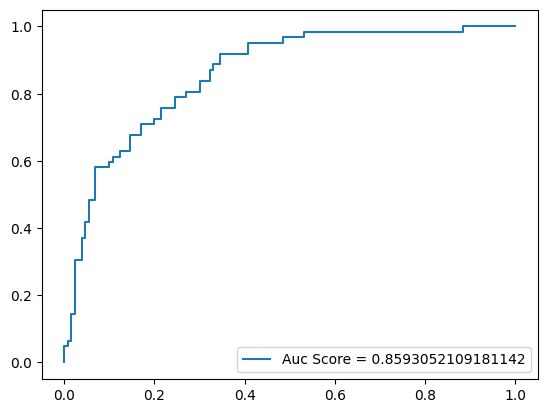

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn import metrics

data = pd.read_csv('diabetes.csv')
data

X = data.drop('Outcome', axis="columns")

y = data["Outcome"] # target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
print(X_train.shape, X_test.shape)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

acc = metrics.accuracy_score(y_test, y_pred)
print("Accuracy: ", acc)


report = metrics.classification_report(y_test, y_pred)
print("Classification Report: \n", report)

matrix = metrics.confusion_matrix(y_test, y_pred)
print("Confusion Matrix: \n", matrix)


y_pred_proba = model.predict_proba(X_test)[::, 1]
print(y_pred_proba[:5])
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.plot(fpr,tpr, label = f"Auc Score = {str(auc)}")
plt.legend(loc=4)
plt.show()